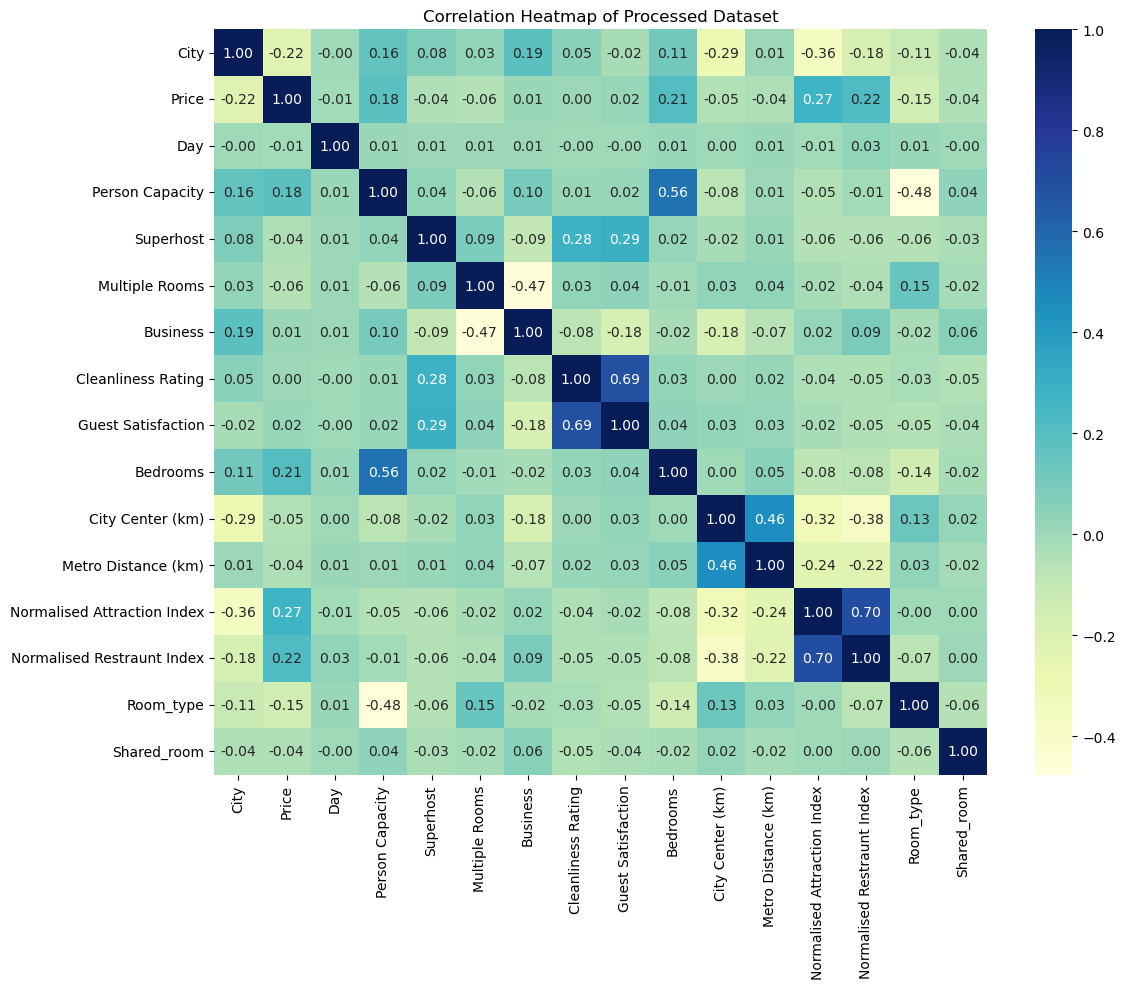

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


#DISPLAYING THE FEATURES IN A HEATMAP


# Step 1: Load the dataset
df = pd.read_csv("Aemf1.csv")

# Step 2: Drop unnecessary columns
df = df.drop(columns=["Attraction Index", "Restraunt Index", "Private Room"])

# Step 3: Map city names to index
city_mapping = {
    'Berlin': 0,
    'Amsterdam': 1,
    'Vienna': 2,
    'Paris': 3,
    'Budapest': 4,
    'Barcelona': 5,
    'Rome': 6,
    'Lisbon': 7,
    'Athens': 8
}
df["City"] = df["City"].map(city_mapping)

# Step 4: Convert categorical features to binary
df["Room_type"] = df["Room Type"].apply(lambda x: 1 if x == "Private room" else 0)
df["Day"] = df["Day"].apply(lambda x: 1 if x == "Weekday" else 0)
df["Shared_room"] = df["Shared Room"].astype(int)
df["Superhost"] = df["Superhost"].astype(int)

# Step 5: Drop the original textual columns
df = df.drop(columns=["Room Type", "Shared Room"])

# Step 6: Create correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Heatmap of Processed Dataset")
plt.tight_layout()
plt.show()


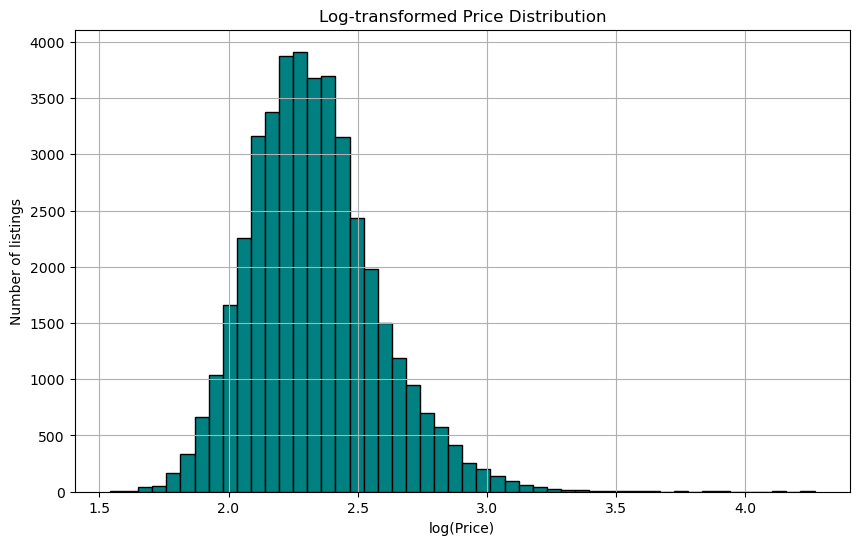

In [10]:
# PRICE HISTOGRAM, LOGARITHMIC SCALE

# Step 1: Dataframe for prices
prices = df['Price']

#Step 2: Create the log-transformed histogram
plt.figure(figsize=(10, 6))
plt.hist(np.log10(df['Price']), bins=50, color='teal', edgecolor='black')
plt.title("Log-transformed Price Distribution")
plt.xlabel("log(Price)")
plt.ylabel("Number of listings")
plt.grid(True)
plt.show()


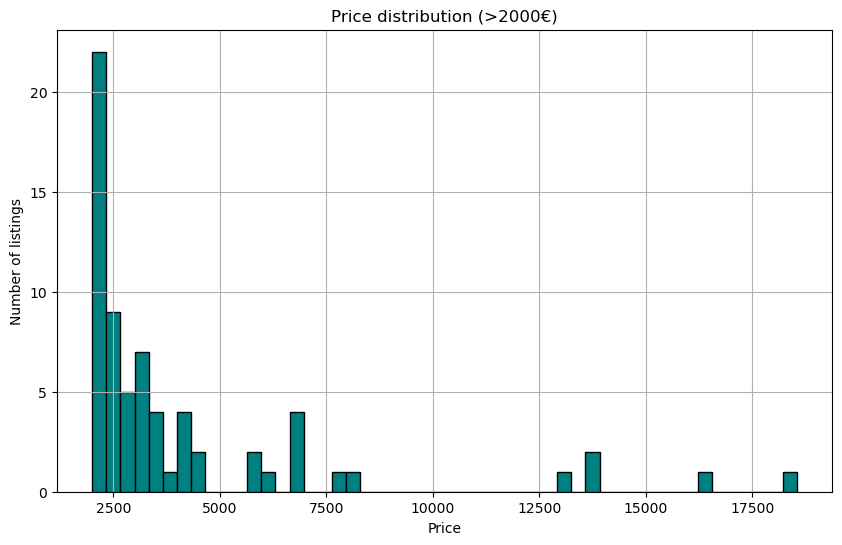

In [11]:
# PRICE HISTOGRAM, HIGH PRICES

# Step 1: Select only listings with a price over 2000€

prices2 = df[(df['Price'] > 2000)]['Price']

# Plot in a histogram
plt.figure(figsize=(10, 6))
plt.hist(prices2, bins=50, color='teal', edgecolor='black')
plt.title("Price distribution (>2000€)")
plt.xlabel("Price")
plt.ylabel("Number of listings")
plt.grid(True)
plt.show()


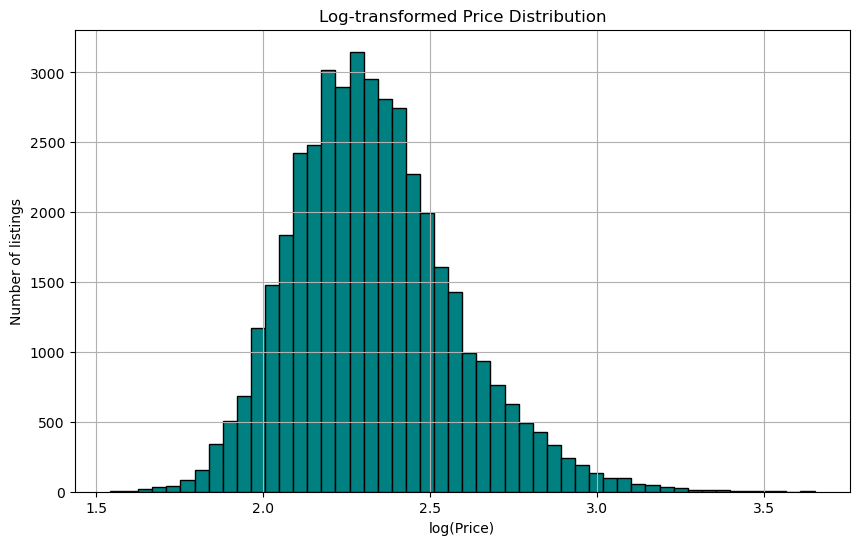

In [12]:
#DATASET CLEANUP

# Step 1: Clean the data
df = df[df['Price'] <= 5000] #remove prices over 5000€
df_cleaned = df.dropna() #remove all rows with at least one null value

# Step 2: Plot in a histogram
plt.figure(figsize=(10, 6))
plt.hist(np.log10(df['Price']), bins=50, color='teal', edgecolor='black')
plt.title("Log-transformed Price Distribution")
plt.xlabel("log(Price)")
plt.ylabel("Number of listings")
plt.grid(True)
plt.show()

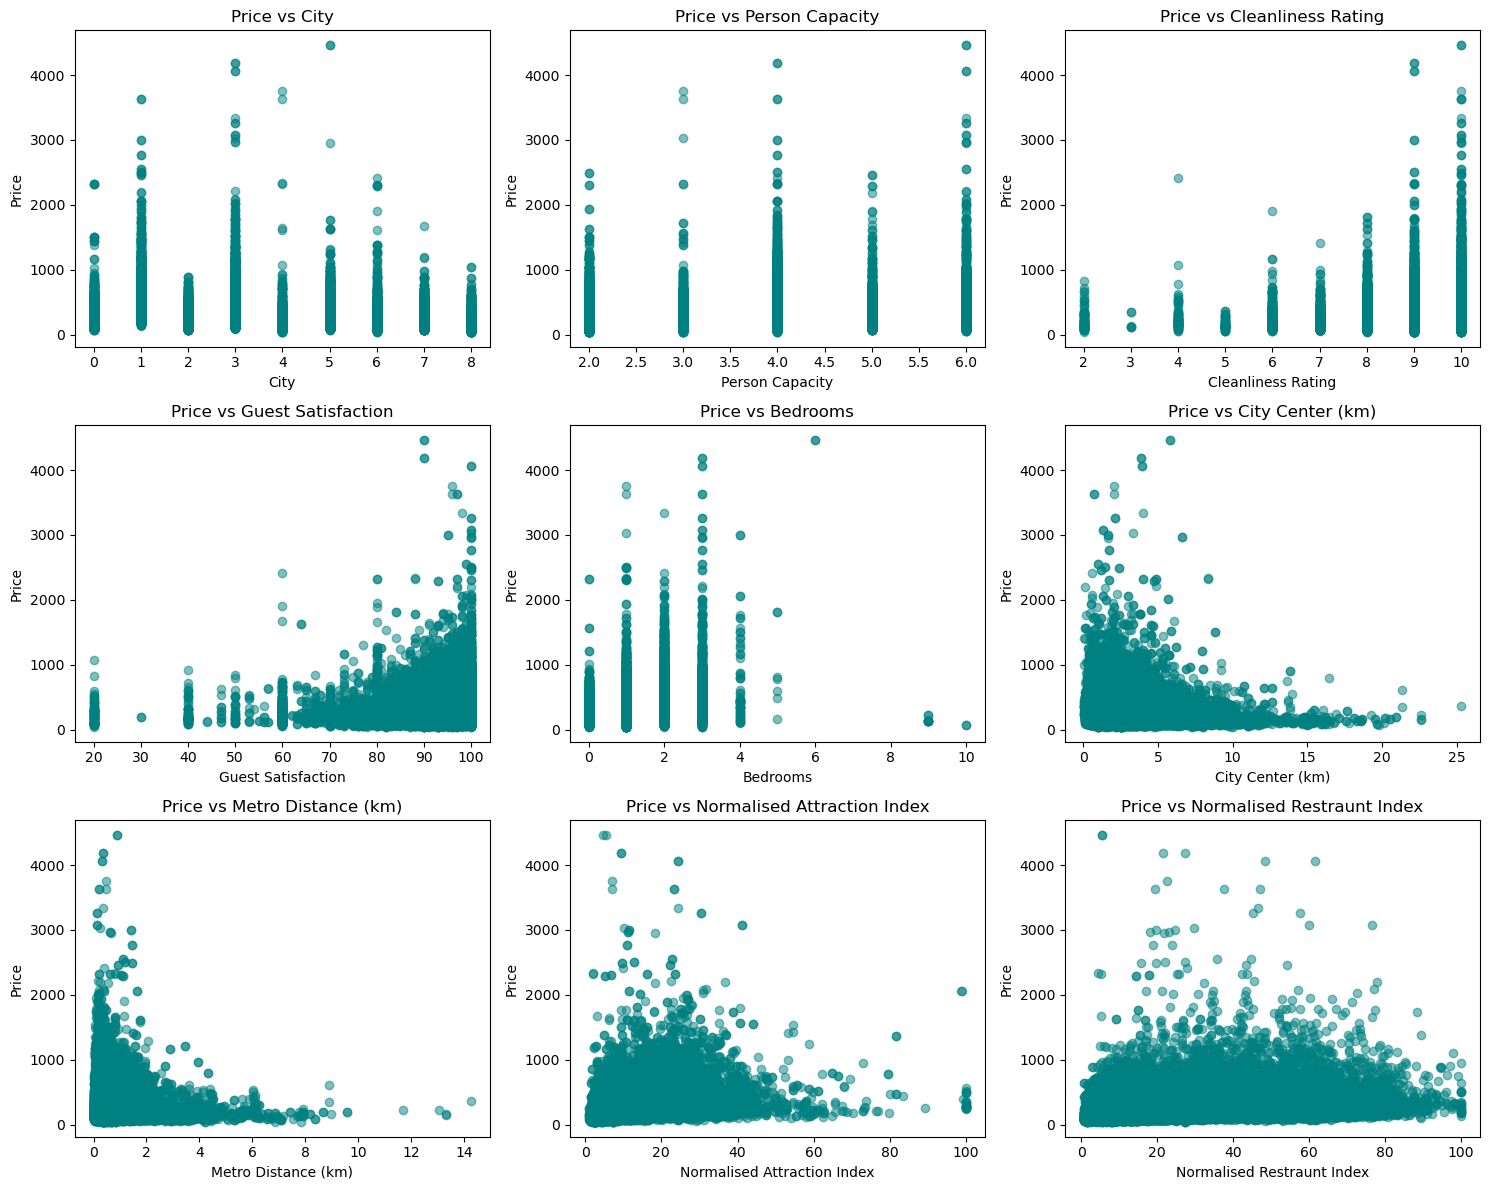

In [13]:

# CREATING SCATTERPLOTS FROM NON-BINARY DATA

# Step 1: Define binary columns (based on earlier preprocessing)
binary_columns = ['Room_type', 'Day', 'Shared_room', 'Superhost', 'Multiple Rooms', 'Business']

# Step 2: Get all numeric columns
all_numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()

# Step 3: Select numeric non-binary features (exclude target and binaries)
features_to_plot = [col for col in all_numeric_columns if col not in binary_columns + ['Price']]

# Step 4: Create scatter plots in a grid
n_cols = 3
n_rows = int(np.ceil(len(features_to_plot) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()

for i, feature in enumerate(features_to_plot):
    axes[i].scatter(df_cleaned[feature], df_cleaned["Price"], alpha=0.5, color='teal')
    axes[i].set_title(f"Price vs {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Price")

# Step 5: Remove extra subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [14]:
# SPLIT THE DATA INTO TRAINING, VALIDATION AND TESTING SUBSETS

from sklearn.model_selection import train_test_split

# Step 1: Prepare X and y for splitting

X = df_cleaned.drop(columns=['City'])
y = df_cleaned['City']

# Step 2: Split into Train (75%) and Temp (25%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.25, random_state=42, shuffle=True
)

# Step 3: Split Temp (25%) into Validation (15%) and Test (10%)
# Since temp is 25%, and we want test to be 10% of full data,
# we compute test_size = 10 / 25 = 0.4
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.4, random_state=42, shuffle=True
)

# Step 4: Final shapes
print("Train set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (31275, 15) (31275,)
Validation set: (6255, 15) (6255,)
Test set: (4170, 15) (4170,)
